In [17]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import shapely.geometry

In [51]:
print(matplotlib.__version__)
print(gpd.__version__)
pd.set_option('max_colwidth', 150)

3.2.0
0.6.1


D:\Anaconda3\envs\dsstudy\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
D:\Anaconda3\envs\dsstudy\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Wall time: 318 ms


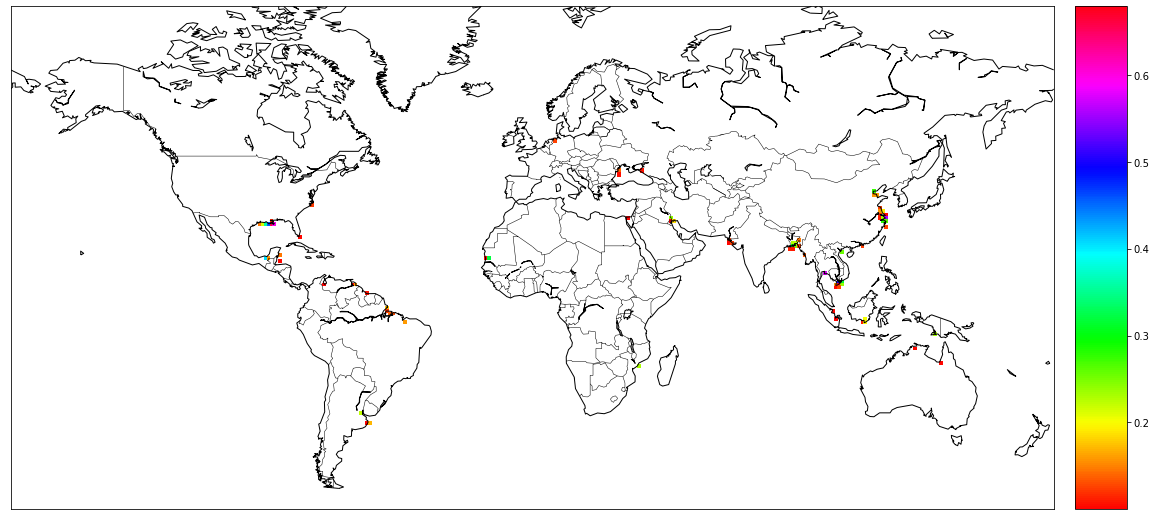

In [94]:
%%time
plt.figure(figsize=(20, 20))
m = Basemap(projection='mill',resolution='c',
            llcrnrlat=-60,urcrnrlat=80,
            llcrnrlon=-180,urcrnrlon=180)
# plot coastlines, draw label meridians and parallels.

#m.drawlsmask(land_color='white',ocean_color='aqua',lakes=True)
#m.drawparallels([-90,-60,-30,0,30,60,90],labels=[1,0,0,0],fontsize=10)
#m.drawmeridians([-180,-120,-60,0,60,120,180],labels=[0,0,0,1],fontsize=10)
latz = np.linspace(-89.5, 89.5, 180)
lonz = np.linspace(-179.5, 179.5, 360)
x, y = np.meshgrid(lonz, latz)
m.pcolormesh(x, -y, diff[(C>0)&(diff>0.1)].values,
             latlon=True, cmap='hsv',alpha=1)
#Madrid
#x,y = m([80],[6])
#m.plot(x,y, marker="o", color="blue", label="Madrid", ls="")
m.drawcoastlines()
m.drawcountries()
m.colorbar()

In [137]:
C = pd.read_csv('./data/C_stock.csv', header=None)
#C[C>0] = 1
df = pd.read_csv('./data/land_t0.csv', header=None)
df_50 = pd.read_csv('./data/land_50.csv', header=None)
df_100 = pd.read_csv('./data/land_100.csv', header=None)
df_200 = pd.read_csv('./data/land_200.csv', header=None)
diff = df-df_100

In [52]:
df_100.values.sum()

14768.6713651

In [135]:
C = pd.read_csv('./data/C_stock.csv', header=None)
#C[C>0] = 1
df = pd.read_csv('./data/gdp_1.csv', header=None)
df_100 = pd.read_csv('./data/gdp_100.csv', header=None)
#df_nf_100 = pd.read_csv('./data/gdp_nf_100.csv', header=None)

D:\Anaconda3\envs\dsstudy\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
D:\Anaconda3\envs\dsstudy\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Wall time: 280 ms


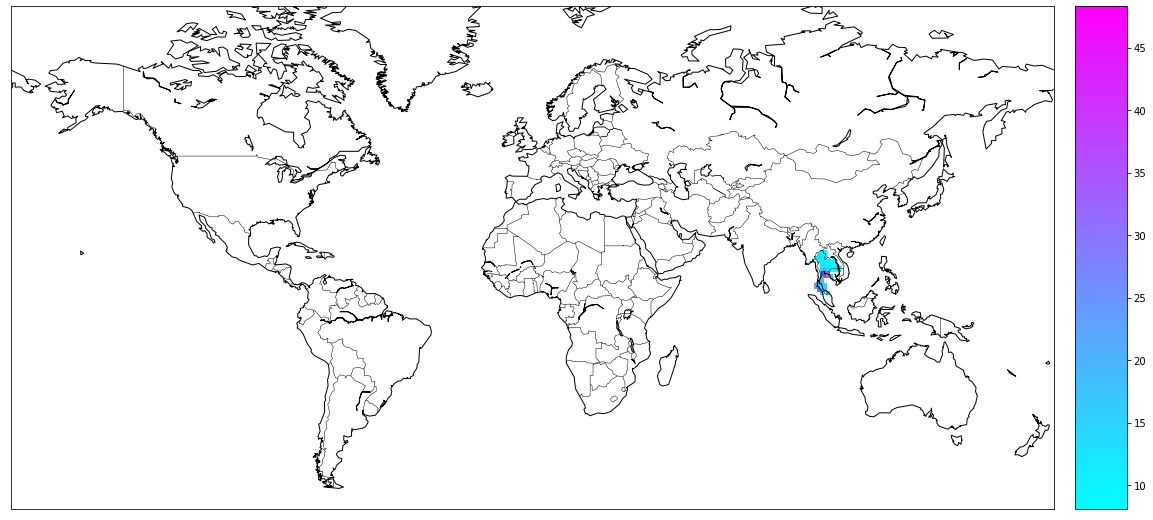

In [106]:
%%time
plt.figure(figsize=(20, 20))
m = Basemap(projection='mill',resolution='c',
            llcrnrlat=-60,urcrnrlat=80,
            llcrnrlon=-180,urcrnrlon=180)
# plot coastlines, draw label meridians and parallels.

#m.drawlsmask(land_color='white',ocean_color='aqua',lakes=True)
#m.drawparallels([-90,-60,-30,0,30,60,90],labels=[1,0,0,0],fontsize=10)
#m.drawmeridians([-180,-120,-60,0,60,120,180],labels=[0,0,0,1],fontsize=10)
latz = np.linspace(-89.5, 89.5, 180)
lonz = np.linspace(-179.5, 179.5, 360)
x, y = np.meshgrid(lonz, latz)
m.pcolormesh(x, -y, df_100[(C==151)].values,
             latlon=True, cmap='cool',alpha=1)
#Madrid
#x,y = m([80],[6])
#m.plot(x,y, marker="o", color="blue", label="Madrid", ls="")
m.drawcoastlines()
m.drawcountries()
m.colorbar()

In [138]:
i = 166
c_gdp = pd.DataFrame(list(zip(y[C==i].flatten()*-1,x[C==i].flatten(),diff.values[C==i].flatten())),
             columns=['lat','lon','gdp'])
c_gdp.to_csv('./output/US_gdp.csv',index=False)

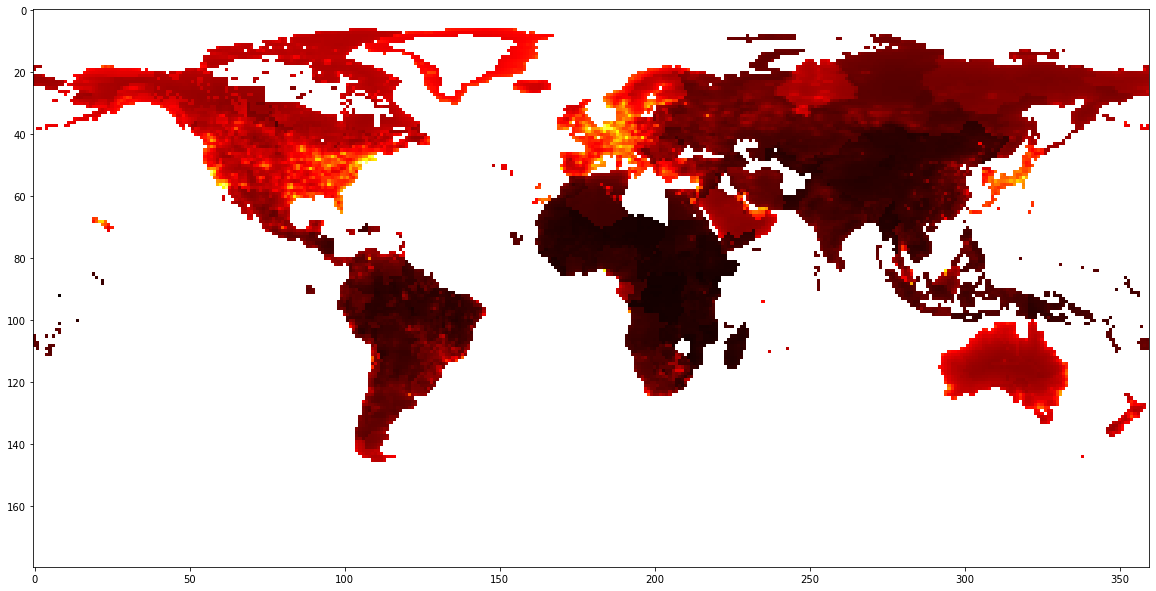

In [156]:
plt.figure(figsize=(20, 20))
plt.imshow(df_100[C>0].values, cmap='hot')

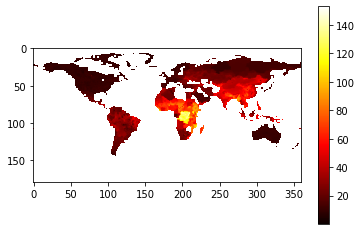

In [161]:
#plt.figure(figsize=(20, 20))
plt.imshow((df_100/df-1)[C>0].values, cmap='hot')
plt.colorbar()

## Grid Build

In [73]:
cbsa = gpd.read_file('./data/tl_2017_us_cbsa/tl_2017_us_cbsa.shp')

In [74]:
cbsa.crs

{'init': 'epsg:4269'}

Wall time: 597 ms


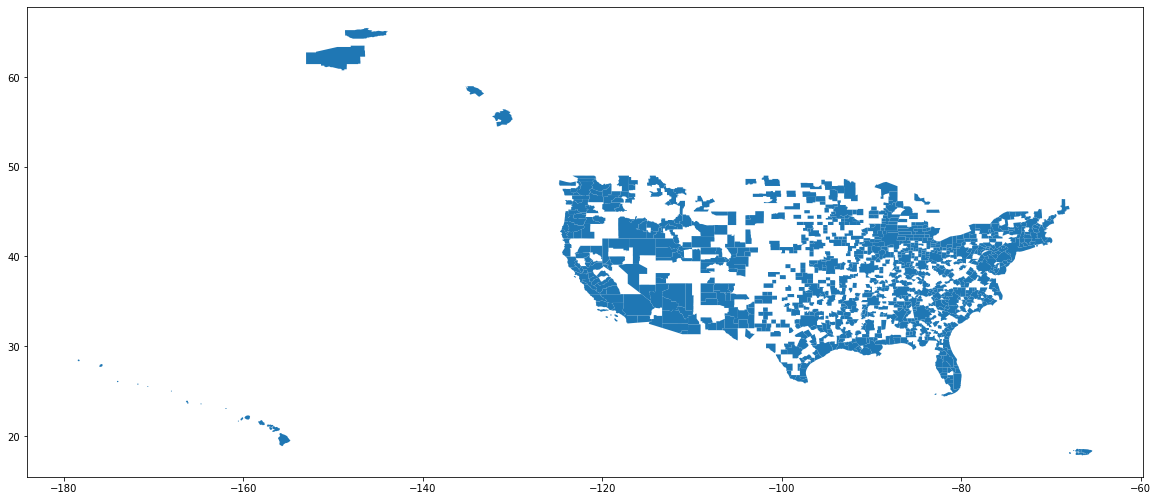

In [59]:
%%time
fig, ax = plt.subplots(figsize=(20, 20))
cbsa.plot(ax=ax)

In [60]:
cbsa.total_bounds

array([-178.443593,   17.831509,  -65.422706,   65.453523])

In [75]:
# total area for the grid
xmin, ymin, xmax, ymax= [-179,-90,180,89]
# how many cells across and down
#n_cells=64800
cell_size = 1
# projection of the grid
crs = "epsg:4269"
# create the cells in a loop
grid_cells = []
lat = []
lon = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
        lat.append(y0)
        lon.append(x0)
cell = gpd.GeoDataFrame({'lat':lat,'lon':lon,'geometry':grid_cells}, 
                                 crs=cbsa.crs)

In [76]:
print(cell.shape)
print(cell.total_bounds)

(64800, 3)
[-180.  -90.  180.   90.]


Wall time: 10.2 s


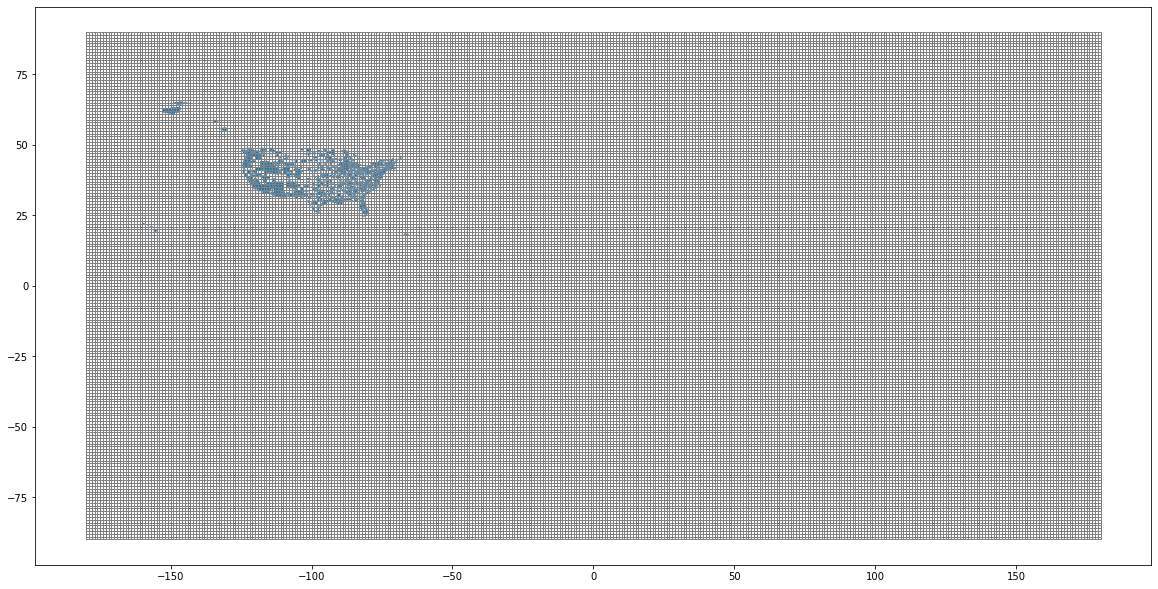

In [66]:
%%time
fig, ax = plt.subplots(figsize=(20, 20))
cbsa.plot(ax=ax)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')

In [77]:
cell.head()

,lat,lon,geometry
0,-90,-179,"POLYGON ((-180.00000 -90.00000, -180.00000 -89.00000, -179.00000 -89.00000, -179.00000 -90.00000, -180.00000 -90.00000))"
1,-89,-179,"POLYGON ((-180.00000 -89.00000, -180.00000 -88.00000, -179.00000 -88.00000, -179.00000 -89.00000, -180.00000 -89.00000))"
2,-88,-179,"POLYGON ((-180.00000 -88.00000, -180.00000 -87.00000, -179.00000 -87.00000, -179.00000 -88.00000, -180.00000 -88.00000))"
3,-87,-179,"POLYGON ((-180.00000 -87.00000, -180.00000 -86.00000, -179.00000 -86.00000, -179.00000 -87.00000, -180.00000 -87.00000))"
4,-86,-179,"POLYGON ((-180.00000 -86.00000, -180.00000 -85.00000, -179.00000 -85.00000, -179.00000 -86.00000, -180.00000 -86.00000))"


In [78]:
cbsa.head(3)

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,462,40340,40340,"Rochester, MN","Rochester, MN Metro Area",M1,1,G3110,6415412346,75315930,+43.9499166,-092.3356986,"POLYGON ((-92.67872 44.19552, -92.67852 44.19552, -92.67793 44.19552, -92.67773 44.19553, -92.67646 44.19554, -92.67263 44.19558, -92.67136 44.195..."
1,450,39580,39580,"Raleigh, NC","Raleigh, NC Metro Area",M1,1,G3110,5485063049,76967367,+35.7567464,-078.4604412,"POLYGON ((-78.54641 36.02183, -78.54641 36.02206, -78.54640 36.02234, -78.54633 36.02408, -78.54625 36.02613, -78.54619 36.02768, -78.54607 36.031..."
2,452,39660,39660,"Rapid City, SD","Rapid City, SD Metro Area",M1,1,G3110,20213988388,56100766,+44.1951082,-102.9166120,"POLYGON ((-103.45245 44.14077, -103.45247 44.14177, -103.45248 44.14263, -103.45264 44.15461, -103.45260 44.16300, -103.45257 44.16920, -103.45257..."


In [81]:
cbsa_grid = gpd.sjoin(cbsa[['CBSAFP','NAME','geometry']],cell,how='left',op='intersects')

In [82]:
cbsa_grid.columns

Index(['CBSAFP', 'NAME', 'geometry', 'index_right', 'lat', 'lon'], dtype='object')

In [83]:
cbsa_grid[['CBSAFP', 'NAME','lat', 'lon']].to_csv('./output/cbsa_grid.csv',index=False)